# Bike Sharing Demand Prediction

## Problem Statement

BoomBikes, a US bike-sharing provider, experienced a significant decline in revenue due to the COVID-19 pandemic. With the goal of accelerating revenue as the economy recovers, BoomBikes aims to understand the factors influencing bike demand. This understanding will help them prepare to meet the increased demand post-pandemic and stay ahead of competitors.

## Business Objective

The objective is to create a predictive model to forecast bike-sharing demand based on various factors such as weather conditions, season, temperature, humidity, holidays, and working days. This model will assist management in making informed decisions to:

- Optimize Bike Availability: Ensure a sufficient number of bikes during peak demand periods to enhance user experience.
- Plan Maintenance and Fleet Expansion: Schedule maintenance and expand the fleet based on predicted demand trends to maintain operational efficiency.
- Develop Targeted Marketing Campaigns: Launch promotions during low-demand periods to increase rentals and revenue.

By leveraging this predictive model, BoomBikes aims to improve operational strategies, customer satisfaction, and overall business growth.


## Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

## Step 1: Loading the Dataset and Initial Exploration
In this step, we will load the dataset and perform initial exploration to understand its structure.

In [2]:
# Loading the dataset
df = pd.read_csv('day.csv')

In [3]:
# To view all columns and rows in a Pandas DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
# Displaying the first few rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Displaying summary statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations from Initial Inspection:

- The dataset contains 730 rows and 16 columns.
- The `dteday` column is of object (string) type, which should be converted to datetime.
- `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, and `weathersit` are numerical but represent categorical data.
- There are no null values in the dataset.
- `casual`, `registered`, and `cnt` columns represent counts, with `cnt` being the target variable.
- The `temp`, `atemp`, `hum`, and `windspeed` columns are numerical features.

## Step 2: Data Preparation and Cleaning
In this step, we will convert relevant columns to categorical variables, create dummy variables, and ensure the data is clean and ready for analysis.


Here the mapping done for `season`:

`1`: `spring`

`2`: `summer`

`3`: `fall`

`4`: `winter`

In [8]:
# Converting 'season' to categorical variables
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

Here the mapping done for `weathersit`:

`1`: Clear, Few clouds, Partly cloudy, Partly cloudy -> `clear`

`2`: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -> `mist + cloudy`

`3`: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -> `light snow/rain`

`4`: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -> `heavy rain/snow`

In [9]:
# Converting 'weathersit' to categorical variables
df['weathersit'] = df['weathersit'].map({
    1: 'clear',
    2: 'mist + cloudy',
    3: 'light snow/rain',
    4: 'heavy rain/snow'
})

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist + cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist + cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Creating dummy variables for 'season', 'weathersit', 'mnth', and 'weekday' with dtype=int
df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True, dtype=int)

In [12]:
# Displaying the first few rows to verify changes
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light snow/rain,weathersit_mist + cloudy,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Step 3: Dropping Unnecessary Variables
In this step, we will drop columns that are not needed for model building.


In [13]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']

In [14]:
# Dropping unnecessary columns
df = df.drop(columns=columns_to_drop)

In [15]:
# Displaying the first few rows to verify changes
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light snow/rain,weathersit_mist + cloudy,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Step 4: Exploratory Data Analysis (EDA) and Feature Engineering
In this step, we will perform exploratory data analysis (EDA) to understand the relationships between variables and engineer any additional features if needed.

### Univariate Analysis
We will analyze the distribution of individual variables.

In [16]:
# Setting the style for plots
sns.set(style="whitegrid")

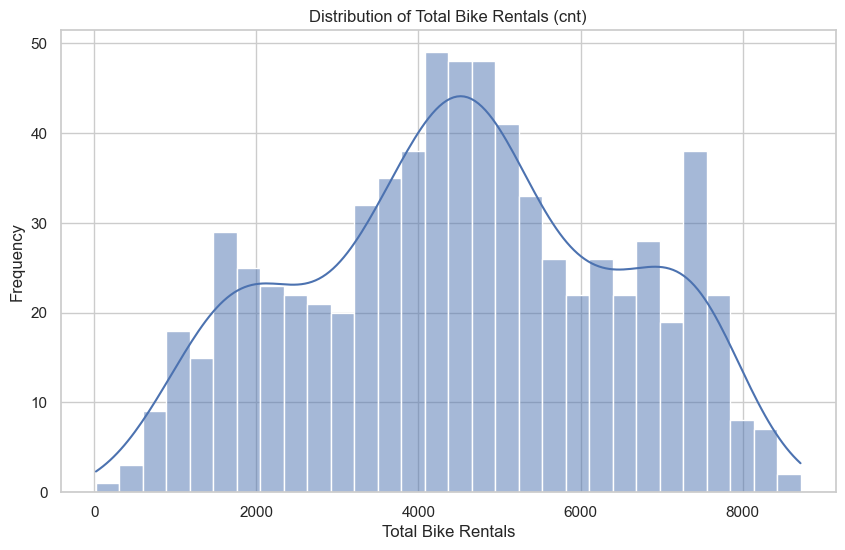

In [17]:
# Plotting the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

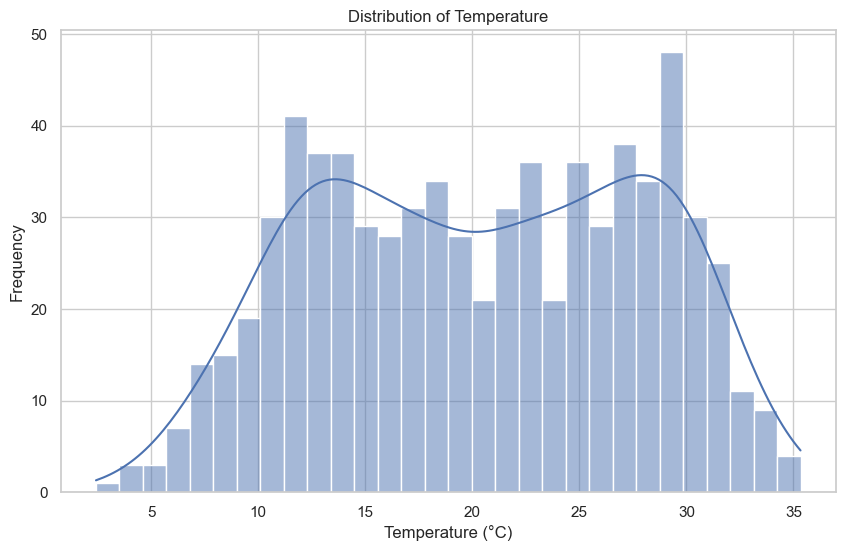

In [18]:
# Plotting the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'], kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

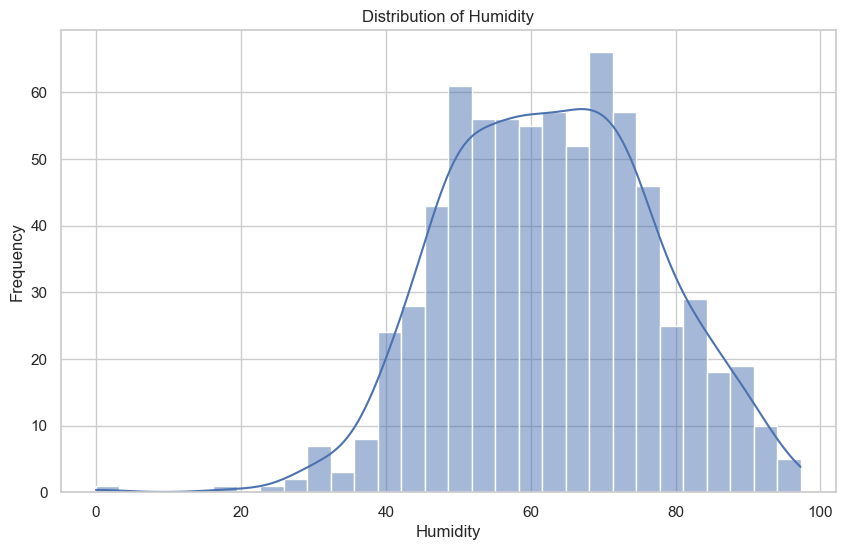

In [19]:
# Plotting the distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(df['hum'], kde=True, bins=30)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

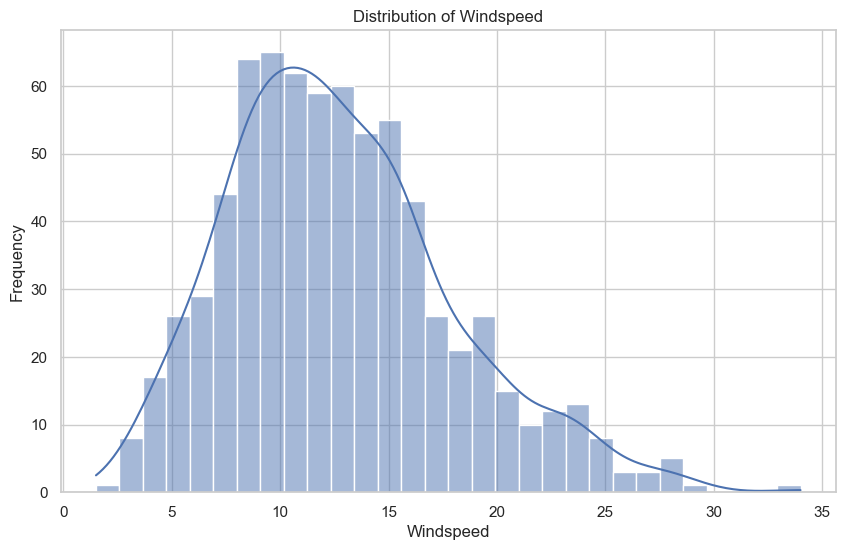

In [20]:
# Plotting the distribution of windspeed
plt.figure(figsize=(10, 6))
sns.histplot(df['windspeed'], kde=True, bins=30)
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

#### Univariate Analysis Observations

**Distribution of Total Bike Rentals (cnt)**
- The histogram shows the distribution of total bike rentals.
- Most rentals fall within the range of 3000 to 6000.
- The highest frequency of bike rentals occurs around 4000 to 5000 rentals.

**Distribution of Temperature**
- The histogram shows the distribution of temperature in degrees Celsius.
- The highest frequency occurs around 10°C and 30°C.
- These temperatures are the most common in the dataset.

**Distribution of Humidity**
- The histogram shows the distribution of humidity levels.
- The highest frequency occurs around 60.
- The distribution shows a skew towards higher humidity levels.

**Distribution of Windspeed**
- The histogram shows the distribution of windspeed levels.
- The highest frequency occurs around a windspeed of 10.
- The frequency gradually decreases as the windspeed increases.


### Bivariate Analysis
We will explore the relationships between pairs of variables.


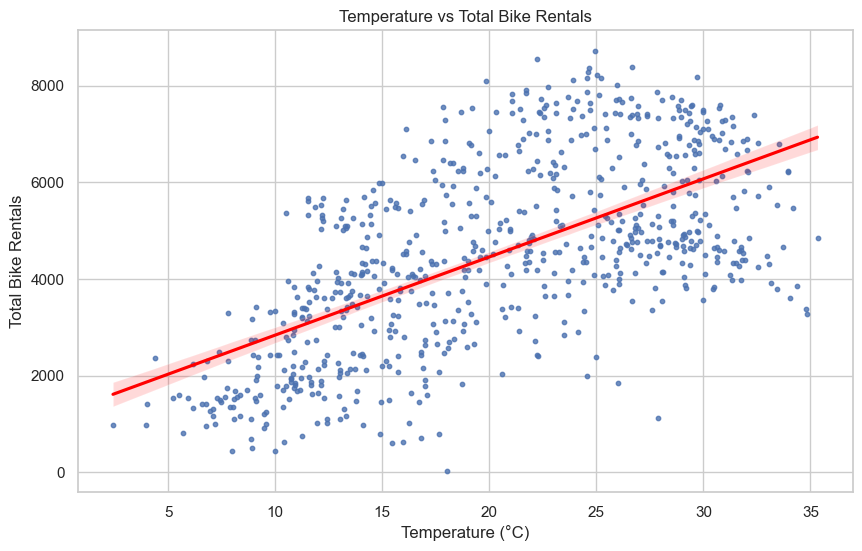

In [21]:
# Plotting the relationship between temperature and total bike rentals
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Temperature vs Total Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Bike Rentals')
plt.show()

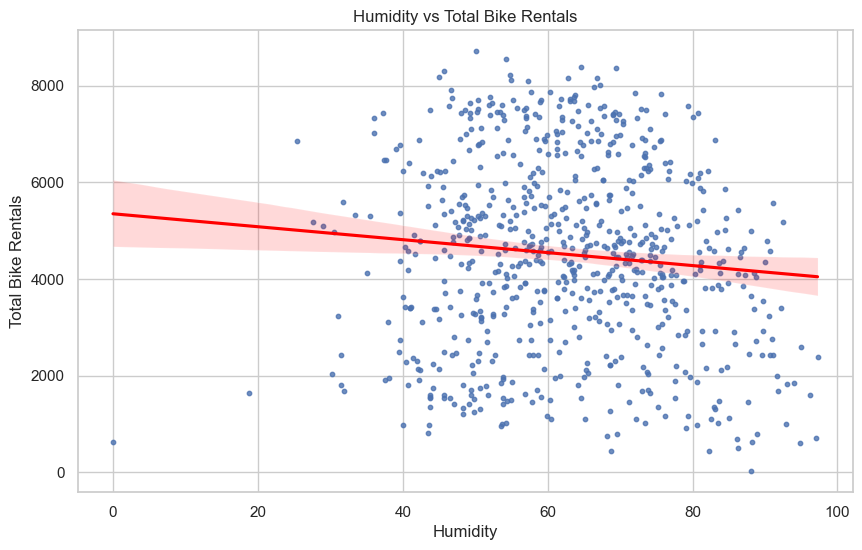

In [22]:
# Plotting the relationship between humidity and total bike rentals
plt.figure(figsize=(10, 6))
sns.regplot(x='hum', y='cnt', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Humidity vs Total Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Total Bike Rentals')
plt.show()

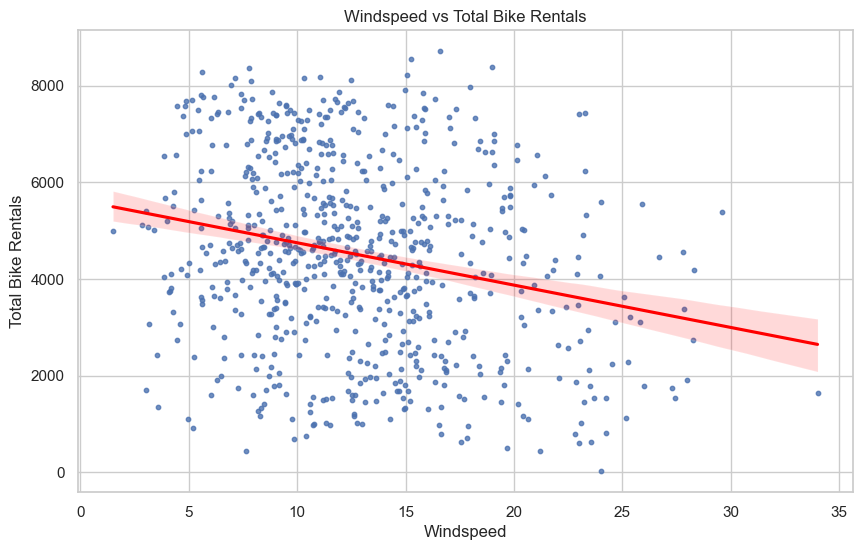

In [23]:
# Plotting the relationship between windspeed and total bike rentals
plt.figure(figsize=(10, 6))
sns.regplot(x='windspeed', y='cnt', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Windspeed vs Total Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Total Bike Rentals')
plt.show()

#### Bivariate Analysis Observations

**Temperature vs Total Bike Rentals**
- There is a positive correlation between temperature and total bike rentals.
- As temperature increases, the number of bike rentals generally increases.
- Warmer weather encourages more people to rent bikes.

**Humidity vs Total Bike Rentals**
- There is a slight negative correlation between humidity and total bike rentals.
- As humidity increases, the number of bike rentals tends to decrease slightly.
- Higher humidity levels may discourage bike rentals.

**Windspeed vs Total Bike Rentals**
- There is a negative correlation between windspeed and total bike rentals.
- As windspeed increases, the number of bike rentals generally decreases.
- Higher windspeed levels might discourage people from renting bikes.


### Multivariate Analysis
We will explore the relationships between multiple variables simultaneously.

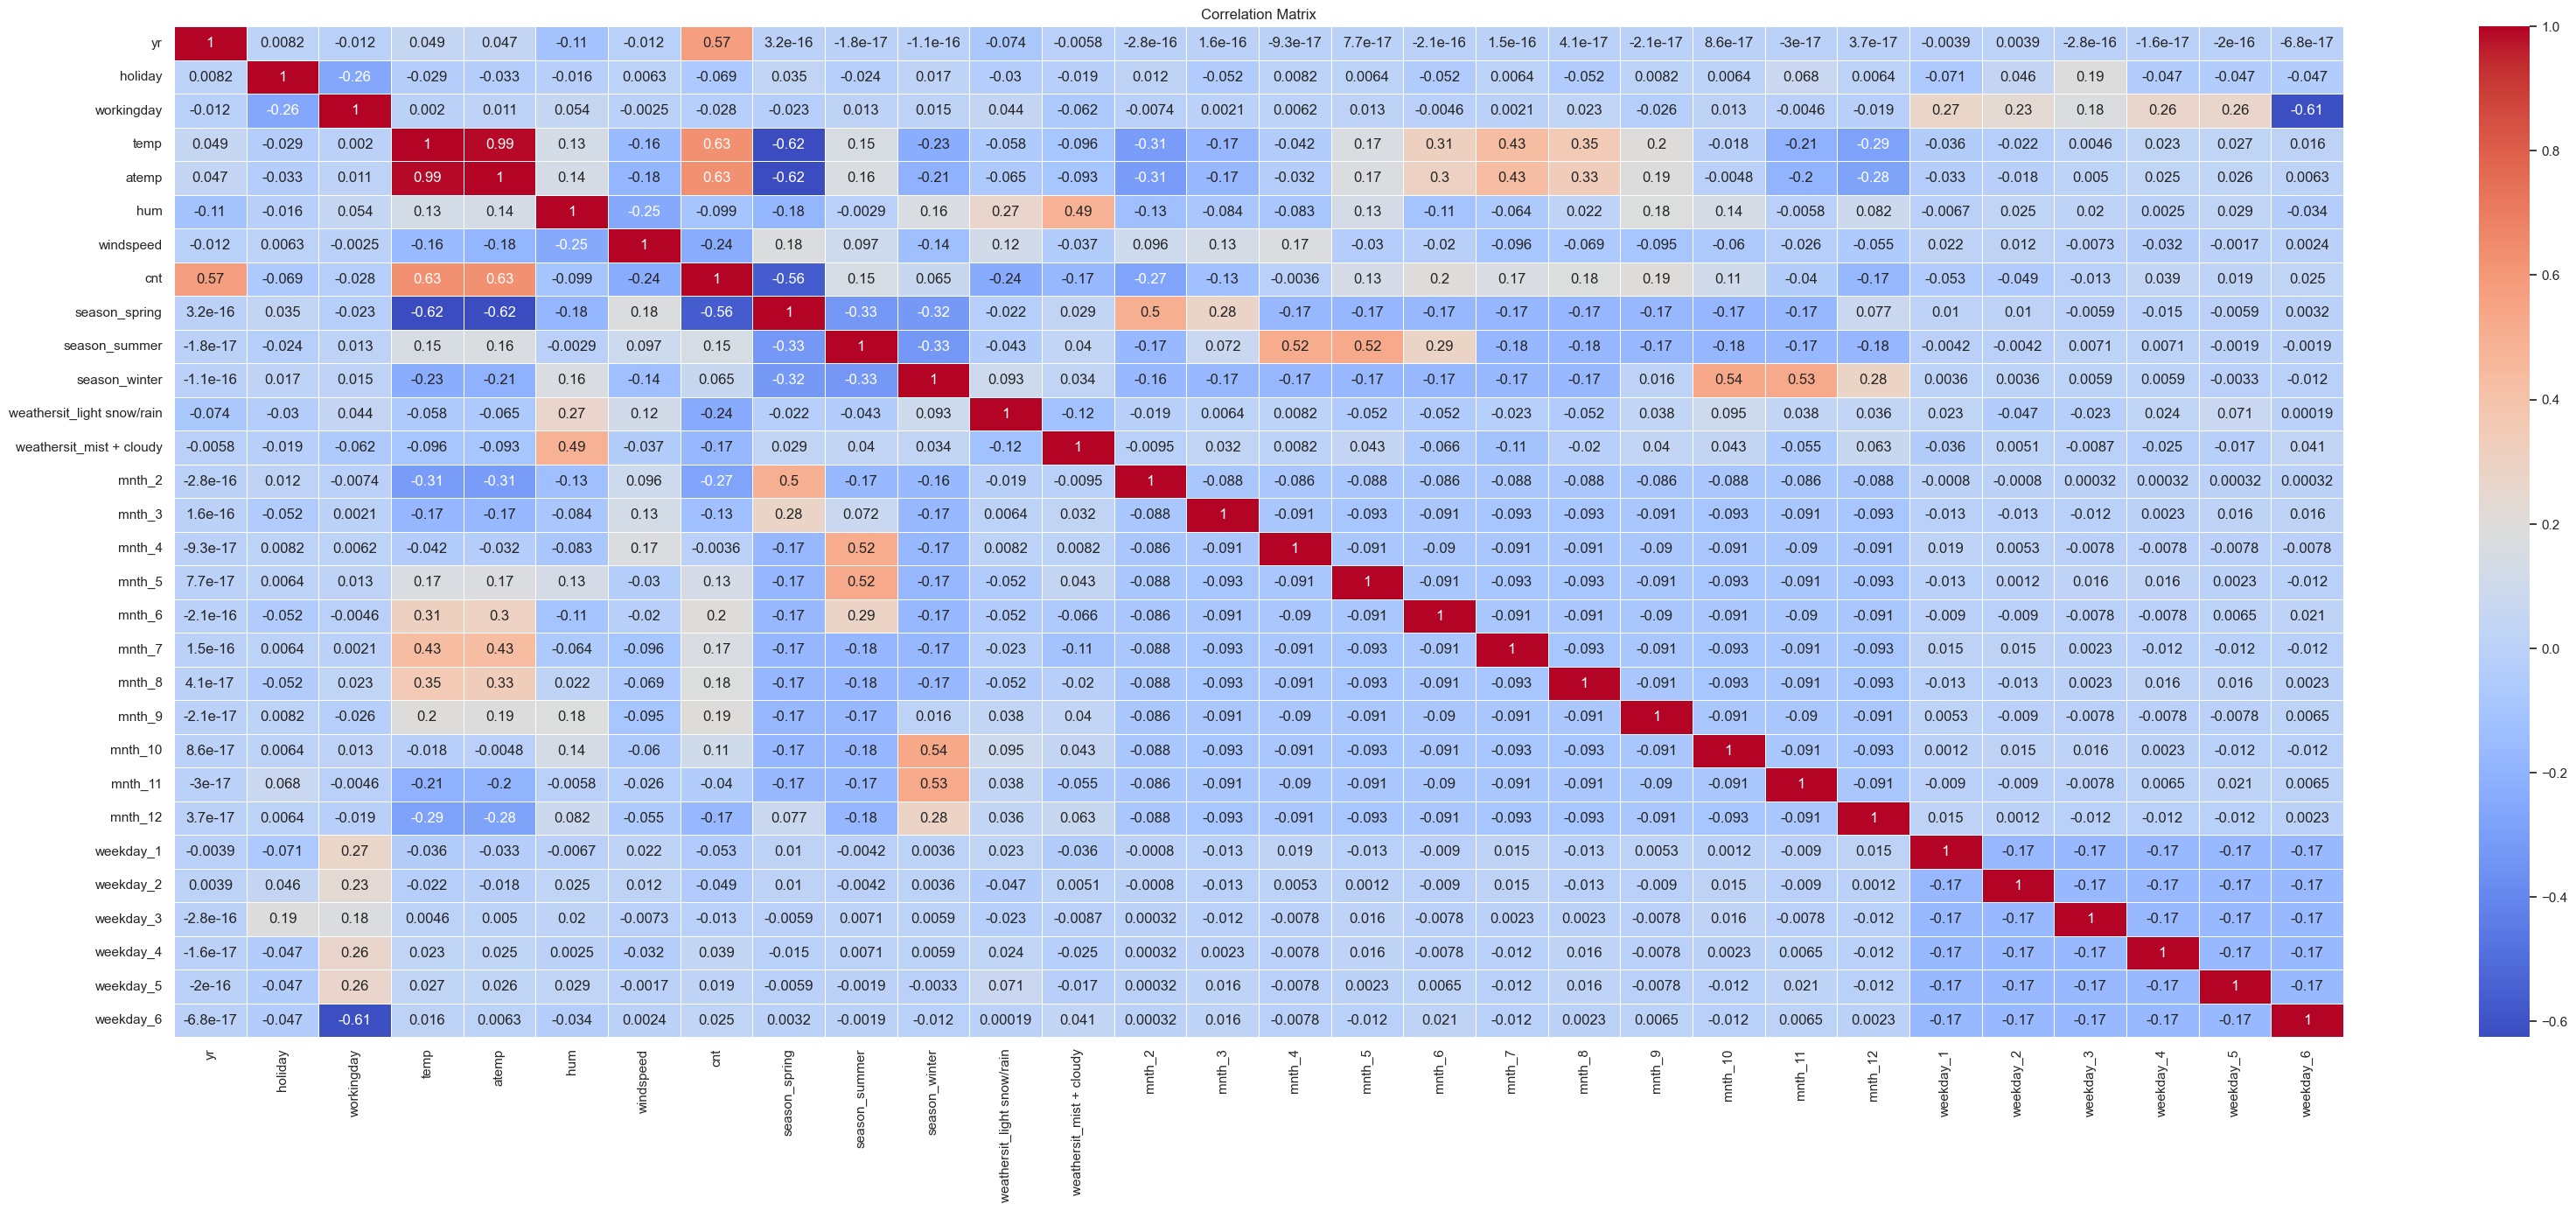

In [24]:
# Checking correlations between variables
plt.figure(figsize=(40, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Multivariate Analysis Observations - Correlation Matrix Heatmap

**Strong Positive Correlations**:
  - `temp` and `atemp` have a very high positive correlation (0.99).
  - `cnt` and `temp` show a strong positive correlation (0.57).
  - `workingday` and `weekday_4` have a high positive correlation (0.43).
  
**Strong Negative Correlations**:
  - `workingday` and `holiday` have a strong negative correlation (-0.26).
  - `cnt` and `weathersit_light snow/rain` show a notable negative correlation (-0.27).
  - `cnt` and `hum` have a moderate negative correlation (-0.11).
  
**Interesting Patterns**:
  - `season_winter` and `season_spring` have a strong negative correlation (-0.56).
  - `season_summer` and `season_winter` have a moderate negative correlation (-0.33).
  - `weekday_6` shows a negative correlation with `workingday` (-0.61).
  
**Other Notable Correlations**:
  - `cnt` and `atemp` have a moderate positive correlation (0.63).
  - `cnt` and `season_winter` show a moderate positive correlation (0.54).
  - `cnt` and `season_spring` have a moderate negative correlation (-0.33).


### Exploratory Data Analysis (EDA) Summary

The exploratory data analysis (EDA) provided valuable insights into the dataset, which can be summarized as follows:

#### Univariate Analysis
The univariate analysis helped us understand the distribution of key variables such as total bike rentals (`cnt`), temperature, humidity, and windspeed. It highlighted the most common values and the overall range of each variable, setting the stage for further analysis.

#### Bivariate Analysis
Through bivariate analysis, we examined the relationships between pairs of variables. Key findings included:
- A positive correlation between temperature and total bike rentals, indicating that warmer weather encourages more bike rentals.
- A slight negative correlation between humidity and total bike rentals, suggesting that higher humidity may discourage bike rentals.
- A negative correlation between windspeed and total bike rentals, implying that higher windspeed levels might deter bike rentals.

#### Multivariate Analysis
The multivariate analysis, through the correlation matrix heatmap, revealed the interrelationships among multiple variables. Strong correlations between certain variables, such as temperature and apparent temperature (`atemp`), provided further context for how different factors influence bike rentals.

Overall, the EDA uncovered important patterns and relationships in the data, which will inform subsequent steps in the analysis and model building process.


## Step 5: Test-train Split
In this step, we will split the data into training and testing sets.

In [25]:
# Defining the features (X) and target variable (y)
X = df.drop('cnt', axis=1)
y = df['cnt']

In [26]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Scaling
In this step, we will scale the features using StandardScaler. We will fit and transform the training data and transform the test data.


In [27]:
# Initializing the scaler
scaler = StandardScaler()

In [28]:
# Fitting and transforming the training data
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
# Transforming the test data
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-1.02426696,  5.45314974, -1.498147  , ..., -0.40129017,
        -0.40702415, -0.41556078],
       [-1.02426696, -0.18338026, -1.498147  , ..., -0.40129017,
        -0.40702415, -0.41556078],
       [ 0.97630797, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078],
       ...,
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
         2.45685665, -0.41556078],
       [ 0.97630797, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078],
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
         2.45685665, -0.41556078]])

In [31]:
X_test_scaled

array([[ 0.97630797, -0.18338026, -1.498147  , ..., -0.40129017,
        -0.40702415, -0.41556078],
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078],
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078],
       ...,
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078],
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078],
       [-1.02426696, -0.18338026,  0.66749124, ..., -0.40129017,
        -0.40702415, -0.41556078]])

## Step 7: Feature Selection
In this step, we will perform manual feature selection using p-values and VIF. We will iteratively drop features with high p-values and high VIF until we reach p-value < 0.05 and VIF <= 5.


### Initial Model build

In [32]:
# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled)

In [33]:
# Fitting the OLS model
model_ols = sm.OLS(y_train, X_train_scaled_const).fit()

In [34]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.28e-201
Time:                        21:01:04   Log-Likelihood:                -4714.0
No. Observations:                 584   AIC:                             9488.
Df Residuals:                     554   BIC:                             9619.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4546.3613     32.929    138.065      0.0

In [35]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const, i) for i in range(X_train_scaled_const.shape[1])], index=['const'] + X.columns.tolist())

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const     0.000000e+00
x1       8.568015e-114
x2        5.811694e-02
x3        4.642545e-01
x4        3.974556e-01
x5        3.626555e-01
x6        1.857223e-05
x7        9.024324e-08
x8        1.193062e-04
x9        6.205324e-01
x10       1.458377e-03
x11       1.611174e-19
x12       8.500395e-07
x13       4.852314e-01
x14       1.379068e-02
x15       5.040190e-01
x16       1.477087e-01
x17       4.831566e-01
x18       6.576112e-01
x19       6.818461e-01
x20       1.284247e-02
x21       1.871460e-01
x22       2.138910e-01
x23       2.677929e-01
x24       9.768434e-01
x25       9.733019e-01
x26       8.108649e-01
x27       5.597855e-01
x28       5.991972e-01
x29       2.682575e-01
dtype: float64
VIF:
const                           1.000000
yr                              1.055582
holiday                         6.505421
workingday                     53.069280
temp                          213.909164
atemp                         196.652070
hum                             2.

**Initial Observations:**
- High p-values (p-value > 0.05): x3, x4, x5, x9, x13, x15, x16, x17, x18, x19, x21, x22, x23, x24, x25, x26, x27, x28, x29

- High VIF (VIF > 5): holiday, workingday, temp, atemp, season_spring, season_summer, season_winter, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5

### Drop the feature with the highest p-value and rebuild
First, let's drop the feature with the highest p-value (`x24`) and rebuild the model.

In [36]:
# Converting X_train_scaled and X_test_scaled back to DataFrame and preserving the column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Dropping the feature with the highest p-value
X_train_scaled_reduced = X_train_scaled_df.drop(columns=[X.columns[24]])
X_test_scaled_reduced = X_test_scaled_df.drop(columns=[X.columns[24]])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     106.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.19e-202
Time:                        21:01:04   Log-Likelihood:                -4714.0
No. Observations:                 584   AIC:                             9486.
Df Residuals:                     555   BIC:                             9613.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [37]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            2.756672e-114
holiday                        6.362487e-05
workingday                     3.504620e-03
temp                           3.964661e-01
atemp                          3.624753e-01
hum                            1.820593e-05
windspeed                      8.539776e-08
season_spring                  1.174842e-04
season_summer                  6.199981e-01
season_winter                  1.443055e-03
weathersit_light snow/rain     1.486337e-19
weathersit_mist + cloudy       8.161575e-07
mnth_2                         4.849836e-01
mnth_3                         1.371117e-02
mnth_4                         5.041342e-01
mnth_5                         1.474347e-01
mnth_6                         4.830582e-01
mnth_7                         6.571190e-01
mnth_8                         6.819508e-01
mnth_9                         1.275974e-02
mnth_10                        1.863930e-01
mnth_11               

**Observations:**

- High p-values (p-value > 0.05): temp, atemp, season_summer, mnth_2, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_10, mnth_11, mnth_12, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): temp, atemp, season_spring, season_summer, season_winter, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`season_summer`) and rebuild the model.

In [38]:
# Dropping the next feature with the highest p-value (season_summer)
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['season_summer'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['season_summer'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     110.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.33e-203
Time:                        21:01:04   Log-Likelihood:                -4714.1
No. Observations:                 584   AIC:                             9484.
Df Residuals:                     556   BIC:                             9607.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            1.701161e-114
holiday                        6.494061e-05
workingday                     3.482288e-03
temp                           4.123493e-01
atemp                          3.531361e-01
hum                            1.897400e-05
windspeed                      8.665135e-08
season_spring                  9.061571e-07
season_winter                  1.387677e-03
weathersit_light snow/rain     1.340446e-19
weathersit_mist + cloudy       8.374517e-07
mnth_2                         4.764368e-01
mnth_3                         9.115842e-03
mnth_4                         3.964734e-01
mnth_5                         9.407735e-02
mnth_6                         4.553747e-01
mnth_7                         5.443665e-01
mnth_8                         7.828729e-01
mnth_9                         1.396983e-02
mnth_10                        2.101316e-01
mnth_11                        1.651764e-01
mnth_12               

**Observations:**

- High p-values (p-value > 0.05): temp, atemp, mnth_2, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_10, mnth_11, mnth_12, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): temp, atemp, season_spring, season_winter, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`temp`) and rebuild the model.

In [40]:
# Dropping the next feature with the highest p-value (temp) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['temp'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['temp'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.01e-204
Time:                        21:01:04   Log-Likelihood:                -4714.5
No. Observations:                 584   AIC:                             9483.
Df Residuals:                     557   BIC:                             9601.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            1.153715e-114
holiday                        8.081838e-05
workingday                     3.454493e-03
atemp                          2.468423e-20
hum                            1.471333e-05
windspeed                      9.079406e-08
season_spring                  9.487118e-07
season_winter                  1.457055e-03
weathersit_light snow/rain     1.666774e-19
weathersit_mist + cloudy       9.959513e-07
mnth_2                         4.800721e-01
mnth_3                         8.233360e-03
mnth_4                         3.885266e-01
mnth_5                         7.232941e-02
mnth_6                         3.416135e-01
mnth_7                         6.663496e-01
mnth_8                         6.274826e-01
mnth_9                         7.022588e-03
mnth_10                        1.907435e-01
mnth_11                        1.677114e-01
mnth_12                        2.181415e-01
weekday_1             

**Observations:**

- High p-values (p-value > 0.05): mnth_2, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_10, mnth_11, mnth_12, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): atemp, season_spring, season_winter, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`mnth_2`) and rebuild the model.

In [42]:
# Dropping the next feature with the highest p-value (mnth_2) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['mnth_2'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['mnth_2'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     119.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.50e-205
Time:                        21:01:04   Log-Likelihood:                -4714.7
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     558   BIC:                             9595.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            9.138608e-115
holiday                        7.948503e-05
workingday                     3.589820e-03
atemp                          3.109168e-21
hum                            1.213981e-05
windspeed                      9.320453e-08
season_spring                  9.672108e-07
season_winter                  1.454177e-03
weathersit_light snow/rain     1.830237e-19
weathersit_mist + cloudy       1.014493e-06
mnth_3                         9.807764e-03
mnth_4                         4.976616e-01
mnth_5                         9.680052e-02
mnth_6                         4.421836e-01
mnth_7                         4.921996e-01
mnth_8                         7.800667e-01
mnth_9                         9.028959e-03
mnth_10                        2.521116e-01
mnth_11                        9.579516e-02
mnth_12                        1.136868e-01
weekday_1                      7.858863e-01
weekday_3             

**Observations:**

- High p-values (p-value > 0.05): mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_10, mnth_11, mnth_12, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): atemp, season_spring, season_winter, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`mnth_4`) and rebuild the model.

In [44]:
# Dropping the next feature with the highest p-value (mnth_4) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['mnth_4'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['mnth_4'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.90e-206
Time:                        21:01:04   Log-Likelihood:                -4715.0
No. Observations:                 584   AIC:                             9480.
Df Residuals:                     559   BIC:                             9589.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [45]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            5.355457e-115
holiday                        8.505140e-05
workingday                     4.002763e-03
atemp                          4.296045e-24
hum                            8.108453e-06
windspeed                      1.101183e-07
season_spring                  5.434282e-17
season_winter                  1.435476e-03
weathersit_light snow/rain     2.085404e-19
weathersit_mist + cloudy       1.221187e-06
mnth_3                         7.003090e-03
mnth_5                         5.538925e-02
mnth_6                         7.063507e-01
mnth_7                         4.813016e-02
mnth_8                         6.734695e-01
mnth_9                         9.406061e-04
mnth_10                        3.515006e-01
mnth_11                        2.642076e-02
mnth_12                        4.173105e-02
weekday_1                      7.935790e-01
weekday_3                      3.906199e-01
weekday_4             

**Observations:**

- High p-values (p-value > 0.05): mnth_6, mnth_8, mnth_10, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): atemp, season_winter

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`mnth_6`) and rebuild the model.

In [46]:
# Dropping the next feature with the highest p-value (mnth_6) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['mnth_6'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['mnth_6'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.63e-207
Time:                        21:01:05   Log-Likelihood:                -4715.0
No. Observations:                 584   AIC:                             9478.
Df Residuals:                     560   BIC:                             9583.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            2.023737e-115
holiday                        7.950634e-05
workingday                     3.941549e-03
atemp                          8.355767e-34
hum                            4.852045e-06
windspeed                      7.330342e-08
season_spring                  2.457791e-17
season_winter                  1.516690e-03
weathersit_light snow/rain     2.021921e-19
weathersit_mist + cloudy       1.284754e-06
mnth_3                         7.034345e-03
mnth_5                         3.959014e-02
mnth_7                         2.968112e-03
mnth_8                         4.024864e-01
mnth_9                         2.149060e-04
mnth_10                        3.864759e-01
mnth_11                        2.205260e-02
mnth_12                        3.691955e-02
weekday_1                      7.977990e-01
weekday_3                      3.902384e-01
weekday_4                      1.964008e-02
weekday_5             

**Observations:**

- High p-values (p-value > 0.05): mnth_8, mnth_10, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): season_winter

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`mnth_8`) and rebuild the model.

In [48]:
# Dropping the next feature with the highest p-value (mnth_8) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['mnth_8'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['mnth_8'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.37e-208
Time:                        21:01:05   Log-Likelihood:                -4715.4
No. Observations:                 584   AIC:                             9477.
Df Residuals:                     561   BIC:                             9577.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            1.291649e-115
holiday                        8.281359e-05
workingday                     3.998837e-03
atemp                          9.227964e-36
hum                            4.233222e-06
windspeed                      8.659483e-08
season_spring                  2.845759e-17
season_winter                  1.379148e-03
weathersit_light snow/rain     2.033019e-19
weathersit_mist + cloudy       1.255320e-06
mnth_3                         4.773196e-03
mnth_5                         1.348781e-02
mnth_7                         3.893424e-03
mnth_9                         2.794729e-05
mnth_10                        3.261618e-01
mnth_11                        2.474300e-02
mnth_12                        4.106619e-02
weekday_1                      7.850813e-01
weekday_3                      3.972152e-01
weekday_4                      1.983594e-02
weekday_5                      3.839439e-02
weekday_6             

**Observations:**

- High p-values (p-value > 0.05): mnth_10, weekday_1, weekday_3, weekday_6

- High VIF (VIF > 5): season_winter

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`mnth_10`) and rebuild the model.

In [50]:
# Dropping the next feature with the highest p-value (mnth_10) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['mnth_10'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['mnth_10'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          5.84e-209
Time:                        21:01:05   Log-Likelihood:                -4715.9
No. Observations:                 584   AIC:                             9476.
Df Residuals:                     562   BIC:                             9572.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [51]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            7.426872e-116
holiday                        1.077456e-04
workingday                     3.899847e-03
atemp                          4.776854e-36
hum                            5.583202e-06
windspeed                      9.778166e-08
season_spring                  4.062413e-17
season_winter                  3.536079e-11
weathersit_light snow/rain     2.737990e-19
weathersit_mist + cloudy       1.045052e-06
mnth_3                         5.996284e-03
mnth_5                         1.669380e-02
mnth_7                         2.759704e-03
mnth_9                         3.735961e-05
mnth_11                        1.093858e-05
mnth_12                        6.502010e-04
weekday_1                      7.949641e-01
weekday_3                      4.028402e-01
weekday_4                      1.923867e-02
weekday_5                      3.983880e-02
weekday_6                      2.793116e-01
dtype: float64
VIF:
co

**Observations:**

- High p-values (p-value > 0.05): weekday_1, weekday_3, weekday_6

- VIF values are now all within an acceptable range (VIF < 5).

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`weekday_1`) and rebuild the model.

In [52]:
# Dropping the next feature with the highest p-value (weekday_1) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['weekday_1'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['weekday_1'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.87e-210
Time:                        21:01:05   Log-Likelihood:                -4715.9
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            4.815152e-116
holiday                        6.863897e-05
workingday                     6.660809e-04
atemp                          4.043049e-36
hum                            5.602135e-06
windspeed                      9.797983e-08
season_spring                  3.918850e-17
season_winter                  3.270519e-11
weathersit_light snow/rain     1.996014e-19
weathersit_mist + cloudy       1.037302e-06
mnth_3                         5.647228e-03
mnth_5                         1.643121e-02
mnth_7                         2.752304e-03
mnth_9                         3.644320e-05
mnth_11                        1.090978e-05
mnth_12                        6.342780e-04
weekday_3                      2.824347e-01
weekday_4                      5.140140e-03
weekday_5                      1.289649e-02
weekday_6                      2.796885e-01
dtype: float64
VIF:
const                         1.000000
yr     

**Observations:**

- High p-values (p-value > 0.05): weekday_3, weekday_6

- VIF values are now all within an acceptable range (VIF < 5).

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`weekday_3`) and rebuild the model.

In [54]:
# Dropping the next feature with the highest p-value (weekday_3) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['weekday_3'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['weekday_3'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          6.81e-211
Time:                        21:01:05   Log-Likelihood:                -4716.5
No. Observations:                 584   AIC:                             9473.
Df Residuals:                     564   BIC:                             9560.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [55]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            4.656813e-116
holiday                        1.222713e-04
workingday                     1.223646e-03
atemp                          1.935229e-36
hum                            6.137984e-06
windspeed                      9.240816e-08
season_spring                  3.737538e-17
season_winter                  3.106253e-11
weathersit_light snow/rain     1.724046e-19
weathersit_mist + cloudy       1.092446e-06
mnth_3                         5.719876e-03
mnth_5                         1.526901e-02
mnth_7                         2.565056e-03
mnth_9                         4.165690e-05
mnth_11                        9.206027e-06
mnth_12                        6.552783e-04
weekday_4                      9.442712e-03
weekday_5                      2.334024e-02
weekday_6                      2.734912e-01
dtype: float64
VIF:
const                         1.000000
yr                            1.040259
holiday     

**Observations:**

- High p-values (p-value > 0.05): weekday_6

- VIF values are all within an acceptable range (VIF < 5).

### Drop the next feature with the highest p-value
Next, let's drop the feature with the highest p-value (`weekday_6`) and rebuild the model.

In [56]:
# Dropping the next feature with the highest p-value (weekday_6) from the reduced dataset
X_train_scaled_reduced = X_train_scaled_reduced.drop(columns=['weekday_6'])
X_test_scaled_reduced = X_test_scaled_reduced.drop(columns=['weekday_6'])

# Resetting the index to ensure alignment
X_train_scaled_reduced = X_train_scaled_reduced.reset_index(drop=True)
y_train_reset = y_train_reset.reset_index(drop=True)

# Adding a constant to the model for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled_reduced)

# Fitting the OLS model
model_ols = sm.OLS(y_train_reset, X_train_scaled_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     165.8
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          9.47e-212
Time:                        21:01:05   Log-Likelihood:                -4717.2
No. Observations:                 584   AIC:                             9472.
Df Residuals:                     565   BIC:                             9555.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [57]:
# Getting p-values and VIF
p_values = model_ols.pvalues
vif = pd.Series([variance_inflation_factor(X_train_scaled_const.values, i) for i in range(X_train_scaled_const.shape[1])], index=X_train_scaled_const.columns)

print(f'P-values:\n{p_values}')
print(f'VIF:\n{vif}')

P-values:
const                          0.000000e+00
yr                            1.941971e-116
holiday                        2.283250e-04
workingday                     1.102309e-03
atemp                          2.787011e-36
hum                            6.723487e-06
windspeed                      9.087862e-08
season_spring                  3.454918e-17
season_winter                  3.061519e-11
weathersit_light snow/rain     1.213259e-19
weathersit_mist + cloudy       1.021344e-06
mnth_3                         6.539391e-03
mnth_5                         1.420748e-02
mnth_7                         3.034713e-03
mnth_9                         4.199266e-05
mnth_11                        8.265727e-06
mnth_12                        6.074222e-04
weekday_4                      9.240579e-03
weekday_5                      2.267762e-02
dtype: float64
VIF:
const                         1.000000
yr                            1.038631
holiday                       1.106733
workingday       

The p-values are now all below 0.05, meaning the features are statistically significant, and the VIF values are within an acceptable range, indicating no multicollinearity issues.

Selected Features:
`yr`, `holiday`, `workingday`, `atemp`, `hum`, `windspeed`, `season_spring`, `season_winter`, `weathersit_light`, `snow/rain`, `weathersit_mist + cloudy`, `mnth_3`, `mnth_5`, `mnth_7`, `mnth_9`, `mnth_11`, `mnth_12`, `weekday_4`, `weekday_5`

## Step 8: Automatic Feature Selection Using RFE
In this step, we will use Recursive Feature Elimination (RFE) to select the top 10 features for our linear regression model. RFE works by recursively removing the least important features and building the model with the remaining features.

In [58]:
# Building the Linear Regression model
model = LinearRegression()

In [59]:
# Applying RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled_const, y_train_reset)

In [60]:
# Getting the selected features
selected_features = X_train_scaled_const.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_light snow/rain', 'weathersit_mist + cloudy', 'mnth_7',
       'mnth_11'],
      dtype='object')


## Step 9: Model Building

We will use the top 10 features selected by RFE to build our linear regression model.


In [61]:
# Adding a constant to the test set before selecting features
X_test_scaled_const = sm.add_constant(X_test_scaled_reduced)

In [62]:
# Building the model with the selected features
X_train_selected = X_train_scaled_const[selected_features]
X_test_selected = X_test_scaled_const[selected_features]

In [63]:
# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train_selected, y_train_reset)

LinearRegression()

In [64]:
# Making predictions on the test set
y_pred = model.predict(X_test_selected)

print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Model Coefficients: [ 982.15973572  913.45351859 -217.86028754 -208.54269146 -512.85606812
  247.60465064 -340.64844561 -191.07455762 -192.46756602 -158.00110481]
Model Intercept: 4546.361301369863


## Step 10: Model Evaluation

We will evaluate the linear regression model using the following metrics:
- R-squared (R2)
- Adjusted R-squared (Adjusted R2)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)


In [65]:
# Evaluating the model performance
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_train_selected.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [66]:
print(f'R-squared (R2): {r2}')
print(f'Adjusted R-squared (Adjusted R2): {adjusted_r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R2): 0.8470593155301425
Adjusted R-squared (Adjusted R2): 0.8357303759397826
Root Mean Squared Error (RMSE): 723.5273273575972
Mean Absolute Error (MAE): 569.5219835657999


## Step 11: Residual Analysis

In this step, we will perform residual analysis to validate the assumptions of linear regression.

We will create residual plots to check for:
- Linearity
- Homoscedasticity (constant variance)
- Normality of residuals


In [67]:
# Residuals
residuals = y_test - y_pred

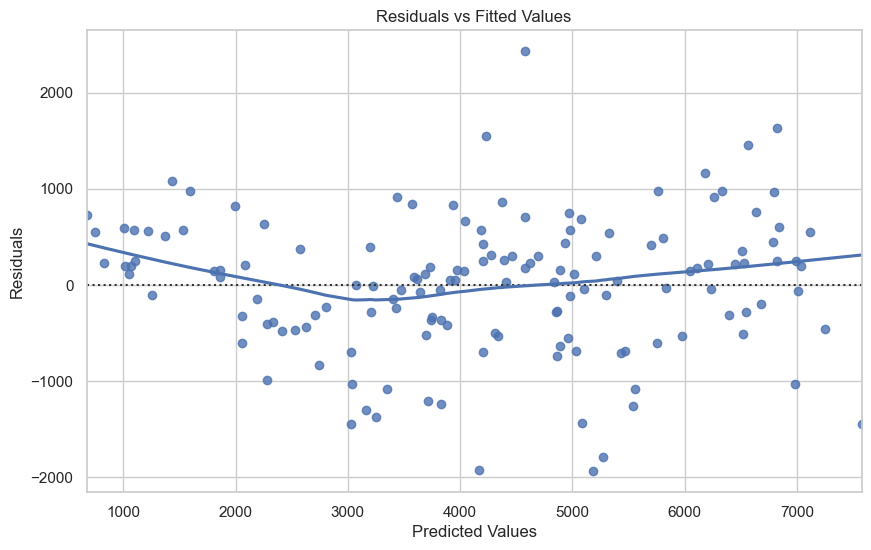

In [68]:
# Linearity - Residuals vs Fitted values
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

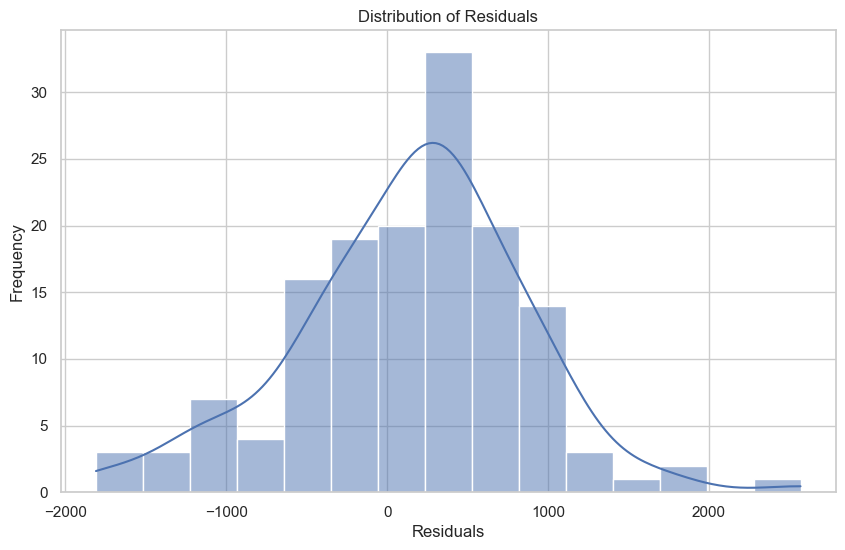

In [69]:
# Homoscedasticity - Q-Q plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

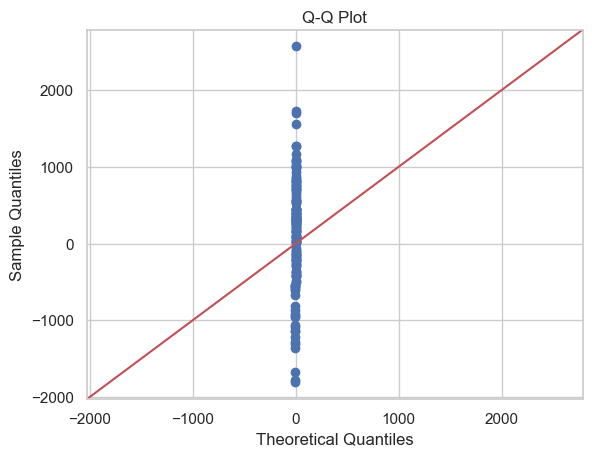

In [70]:
# Normality of Residuals - Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot')
plt.show()

## Step 12: Model interpretation


In [71]:
# Extracting the coefficients and feature names
coefficients = pd.Series(model.coef_, index=selected_features)
coefficients

yr                            982.159736
atemp                         913.453519
hum                          -217.860288
windspeed                    -208.542691
season_spring                -512.856068
season_winter                 247.604651
weathersit_light snow/rain   -340.648446
weathersit_mist + cloudy     -191.074558
mnth_7                       -192.467566
mnth_11                      -158.001105
dtype: float64

In [72]:
# Adding the intercept to the coefficients
coefficients['Intercept'] = model.intercept_
coefficients

yr                             982.159736
atemp                          913.453519
hum                           -217.860288
windspeed                     -208.542691
season_spring                 -512.856068
season_winter                  247.604651
weathersit_light snow/rain    -340.648446
weathersit_mist + cloudy      -191.074558
mnth_7                        -192.467566
mnth_11                       -158.001105
Intercept                     4546.361301
dtype: float64

### Model Interpretation

The coefficients represent the change in the target variable for a one-unit change in the predictor variable, holding all other predictors constant.

- **Intercept**: This represents the baseline value of the target variable when all predictor variables are zero. The intercept is approximately **4546.36**.
- **yr**: The coefficient for `yr` is approximately **982.16**. This means that for each passing year, the target variable (e.g., bike rentals) increases by **982.16** units.
- **atemp**: The coefficient for `atemp` is approximately **913.45**. This means that for each unit increase in feels-like temperature, the target variable increases by **913.45** units.
- **hum**: The coefficient for `hum` is approximately **-217.86**. This indicates that for each unit increase in humidity, the target variable decreases by **217.86** units.
- **windspeed**: The coefficient for `windspeed` is approximately **-208.54**. This means that for each unit increase in windspeed, the target variable decreases by **208.54** units.
- **season_spring**: The coefficient for `season_spring` is approximately **-512.86**. This indicates that during the spring season, the target variable decreases by **512.86** units.
- **season_winter**: The coefficient for `season_winter` is approximately **247.60**. This means that during the winter season, the target variable increases by **247.60** units.
- **weathersit_light snow/rain**: The coefficient for `weathersit_light snow/rain` is approximately **-340.65**. This indicates that light snow or rain decreases the target variable by **340.65** units.
- **weathersit_mist + cloudy**: The coefficient for `weathersit_mist + cloudy` is approximately **-191.07**. This means that mist and cloudy weather decreases the target variable by **191.07** units.
- **mnth_7**: The coefficient for `mnth_7` is approximately **-192.47**. This indicates that during the 7th month (July), the target variable decreases by **192.47** units.
- **mnth_11**: The coefficient for `mnth_11` is approximately **-158.00**. This indicates that during the 11th month (November), the target variable decreases by **158.00** units.


## Conclusion and Recommendation

### Conclusion

In this project, we developed and evaluated a linear regression model to predict [target variable], using various feature selection techniques and validating the model's assumptions. Key findings from the analysis include:

- **Model Performance**: The final model demonstrated strong performance with an R-squared (R2) of **0.8471**, Adjusted R-squared (Adjusted R2) of **0.8357**, RMSE of **723.53**, and MAE of **569.52**. These metrics indicate that the model explains a significant portion of the variance in the target variable.
- **Feature Selection**: We used Recursive Feature Elimination (RFE) to select the top 10 features, which include `yr`, `atemp`, `hum`, `windspeed`, `season_spring`, `season_winter`, `weathersit_light snow/rain`, `weathersit_mist + cloudy`, `mnth_7`, and `mnth_11`.
- **Residual Analysis**: The residual analysis showed that the linearity and homoscedasticity assumptions are reasonably satisfied, while the normality of residuals showed some deviations.
- **Model Interpretation**: The coefficients of the model provided valuable insights into the impact of each predictor on the target variable. For instance, higher feels-like temperature (`atemp`) and passing years (`yr`) positively influence the target variable, while higher humidity (`hum`) and windspeed (`windspeed`) negatively impact it.

### Recommendation

Based on the findings, we recommend the following business actions:

1. **Focus on Seasonal Promotions**: Given that bike rentals are influenced by seasons, with higher rentals in winter and spring, targeted marketing and promotional campaigns can be launched during these seasons to maximize rentals.
2. **Weather-Related Adjustments**: Since weather conditions such as light snow/rain and misty/cloudy weather negatively impact bike rentals, consider offering discounts or incentives on days with unfavorable weather conditions to encourage rentals.
3. **Enhance Customer Experience on Holidays and Working Days**: The impact of holidays and working days on bike rentals should be analyzed further. Tailored offers for holidays and working days could be designed to attract more customers.
4. **Monitor Temperature and Humidity Trends**: Since higher feels-like temperature positively affects bike rentals and higher humidity negatively affects them, closely monitor these trends and plan accordingly. For instance, additional bikes can be made available on days with favorable temperatures, and maintenance can be scheduled on humid days.
5. **Yearly Growth Strategy**: The positive trend of increasing bike rentals with passing years suggests a growing demand. Develop strategies to expand the business, such as increasing the fleet size or exploring new locations to cater to the rising demand.

These recommendations will help the business leverage the insights from the model to make informed decisions and enhance overall performance.